In [52]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

## 1) Single Subject

**Check (and change) current working directory**

In [53]:
#os.getcwd()
#os.listdir(os.getcwd())
os.chdir("C:\Users\Steffi\Desktop\Semester 2\Practical Skills for Researchers\Data")

**Read data**

In [54]:
data = pd.read_csv("data_crowding_pp_01.csv",sep='\t')

**Show data**

In [55]:
data

,Unnamed: 0,RT,key_pressed,target_ecc,target_flank_ratio,target_orientation
0,0,1.093407,right,8.0,0.80,right
1,1,0.839788,right,8.0,0.80,right
2,2,0.794192,right,8.0,0.75,right
3,3,0.635082,left,8.0,0.75,left
4,4,0.948576,right,4.0,0.70,right
5,5,1.205361,right,12.0,0.70,right
6,6,0.757293,right,4.0,0.65,right
7,7,0.863626,left,8.0,0.65,left
8,8,0.777381,left,8.0,0.60,left
9,9,0.759476,right,8.0,0.60,right


**Plot data**

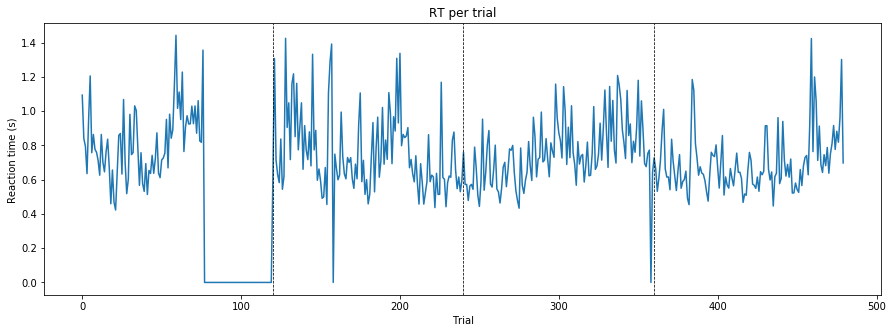

In [56]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(data["RT"])
plt.ylabel("Reaction time (s) ")
plt.xlabel("Trial")
plt.title("RT per trial")
xposition = [120, 240, 360]
for xc in xposition:
    plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.show()

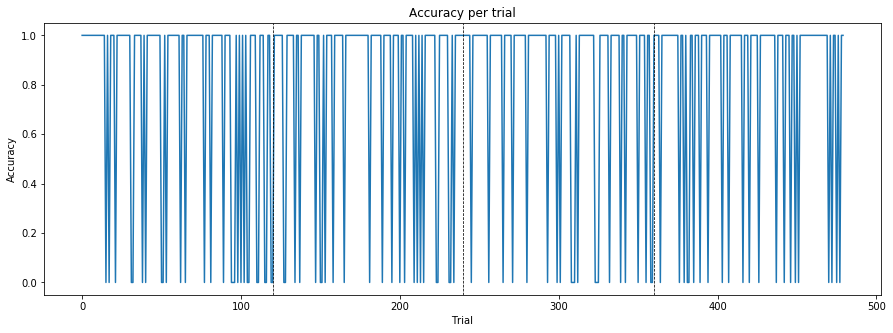

In [57]:
%matplotlib inline
accuracy = data['key_pressed']==data['target_orientation']
plt.figure(figsize=(15,5))
plt.plot(accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Trial")
plt.title("Accuracy per trial")
xposition = [120, 240, 360]
for xc in xposition:
    plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.show()

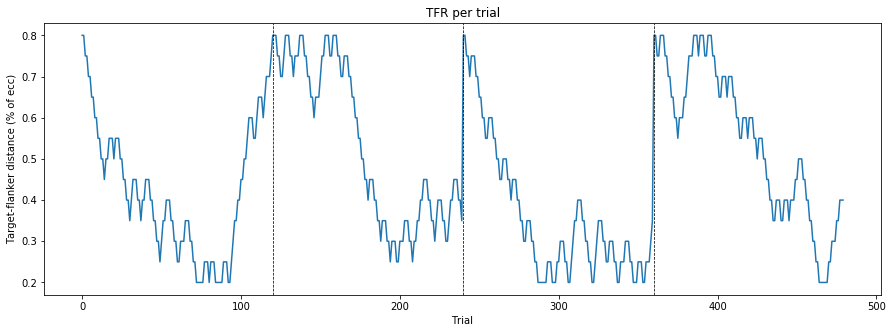

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(data["target_flank_ratio"])
plt.ylabel("Target-flanker distance (% of ecc)")
plt.xlabel("Trial")
plt.title("TFR per trial")
xposition = [120, 240, 360]
for xc in xposition:
    plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.show()

### Data analysis

In [59]:
accuracy = data['key_pressed']==data['target_orientation']
mean_accuracy = float(sum(accuracy))/float(len(accuracy))
print("Mean accuracy across trials:", mean_accuracy)

('Mean accuracy across trials:', 0.7979166666666667)


**Data per eccentricity**

In [60]:
ecc = [4,8,12]
trials_per_ecc = len(data)/len(ecc)
acc_per_ecc = []
ratio_per_ecc = []

for e in ecc:
    ecc_acc = []
    ecc_ratio = []
    
    for i in range(len(data)):
        if data["target_ecc"][i]==e and data['key_pressed'][i]==data['target_orientation'][i]:
            ecc_acc.append(True)
            ecc_ratio.append(data['target_flank_ratio'][i])
        else:
            ecc_acc.append(False)
    
    acc_per_ecc.append(float(sum(ecc_acc))/trials_per_ecc)
    ratio_per_ecc.append(sum(ecc_ratio)/len(ecc_ratio))

print(acc_per_ecc)
print(ratio_per_ecc)

[0.775, 0.84375, 0.775]
[0.45443548387096755, 0.4874074074074076, 0.4467741935483872]


**Data per block**

In [61]:
blocks = 4
trials_per_block = len(data)/blocks
trials_per_block_per_ecc = trials_per_block/len(ecc)

acc_ecc_block = np.zeros((blocks, len(ecc)))
ratio_ecc_block = np.zeros((blocks, len(ecc)))

for b in range(blocks):
    
    for e in range(len(ecc)):
        ecc_acc = []
        ecc_ratio = []

        for i in range((1 + b*trials_per_block), (b*trials_per_block + trials_per_block)):
            if data["target_ecc"][i]==ecc[e] and data['key_pressed'][i]==data['target_orientation'][i]:
                ecc_acc.append(True)
                ecc_ratio.append(data['target_flank_ratio'][i])
            else:
                ecc_acc.append(False)
        
        acc_ecc_block[b,e]=(float(sum(ecc_acc))/trials_per_block_per_ecc)
        ratio_ecc_block[b,e]=(sum(ecc_ratio)/len(ecc_ratio))
        
print(acc_ecc_block)
print(ratio_ecc_block)

[[0.725 0.775 0.775]
 [0.75  0.85  0.775]
 [0.8   0.825 0.8  ]
 [0.825 0.85  0.75 ]]
[[0.3862069  0.4483871  0.3983871 ]
 [0.54       0.52205882 0.53225806]
 [0.3640625  0.38939394 0.33125   ]
 [0.52424242 0.55588235 0.53166667]]


Text(0.5,1,'Accuracy per eccentricity')

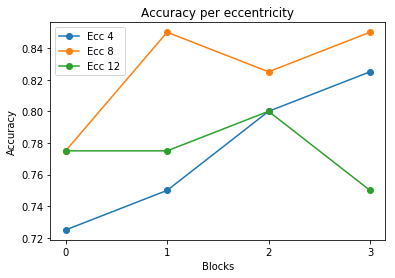

In [62]:
#Plot Accuracy
plt.figure
plt.plot(acc_ecc_block[:,0], marker='o')
plt.plot(acc_ecc_block[:,1], marker='o')
plt.plot(acc_ecc_block[:,2], marker='o')
plt.xlabel("Blocks")
plt.xticks(range(blocks))
plt.ylabel("Accuracy")
plt.legend(["Ecc 4", "Ecc 8", "Ecc 12"])
plt.title("Accuracy per eccentricity")

Text(0.5,1,'Target-Flanker-Ratio per eccentricity')

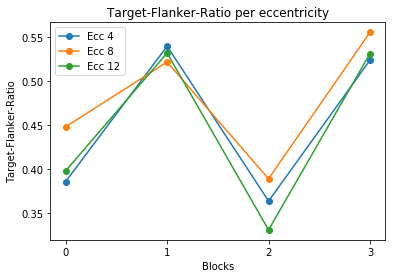

In [63]:
#Plot Target-flanker-ratio
plt.figure
plt.plot(ratio_ecc_block[:,0], marker='o')
plt.plot(ratio_ecc_block[:,1], marker='o')
plt.plot(ratio_ecc_block[:,2], marker='o')
plt.xlabel("Blocks")
plt.xticks(range(blocks))
plt.ylabel("Target-Flanker-Ratio")
plt.legend(["Ecc 4", "Ecc 8", "Ecc 12"])
plt.title("Target-Flanker-Ratio per eccentricity")

## 2) Group of Subjects

**Combine data of individual subjects**

In [64]:
all_files = ["data_crowding_pp_01.csv","data_crowding_pp_02.csv","data_crowding_pp_03.csv","data_crowding_pp_ines.csv"]

subs = []    
for filename in all_files:
    a = pd.read_csv(filename, sep='\t')
    subs.append(a)
data = pd.concat(subs, ignore_index = True)

**Data per eccentricity**

In [65]:
ecc = [4,8,12]
acc_per_ecc = []
ratio_per_ecc = []

for e in ecc:
    ecc_acc = []
    ecc_ratio = []
    
    for i in range(len(data)):
        if data["target_ecc"][i]==e and data['key_pressed'][i]==data['target_orientation'][i]:
            ecc_acc.append(True)
            ecc_ratio.append(data['target_flank_ratio'][i])
        else:
            ecc_acc.append(False)
    
    acc_per_ecc.append(float(sum(ecc_acc))/(len(data)/len(ecc)))
    ratio_per_ecc.append(sum(ecc_ratio)/len(ecc_ratio))

print(acc_per_ecc)
print(ratio_per_ecc)

[0.7296875, 0.7875, 0.7640625]
[0.4088865096359745, 0.44513888888888925, 0.40869120654396723]


**Compare Reaction Times**

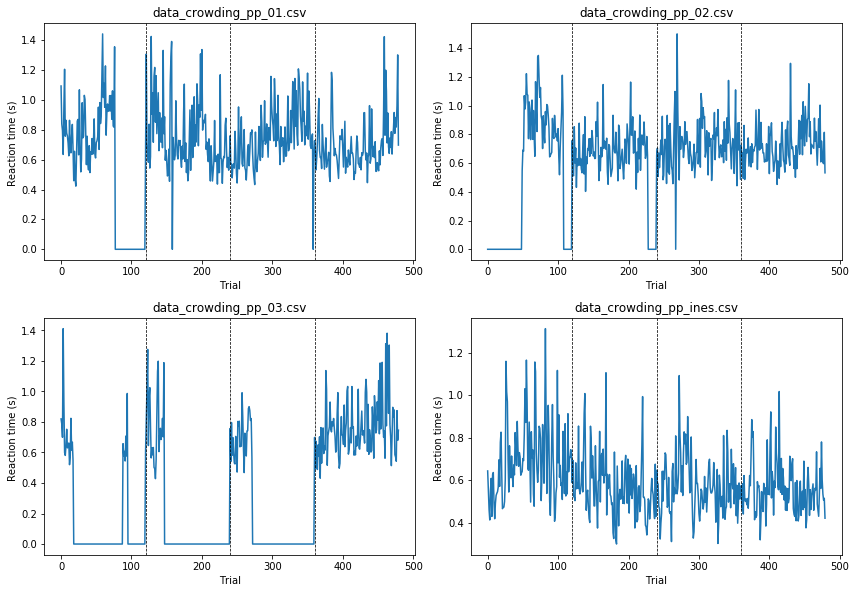

In [66]:
rows = (len(all_files)/2)+1
plt.figure(figsize=(12,rows*4))

for i in range(len(all_files)):
    data_sub = pd.read_csv(all_files[i], sep='\t')
    plt.subplot(rows,2,i+1)
    plt.plot(data_sub["RT"])
    plt.ylabel("Reaction time (s) ")
    plt.xlabel("Trial")
    plt.title(all_files[i])
    xposition = [120, 240, 360]
    for xc in xposition:
        plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.tight_layout()

**Compare Target-Flanker-Ratio**

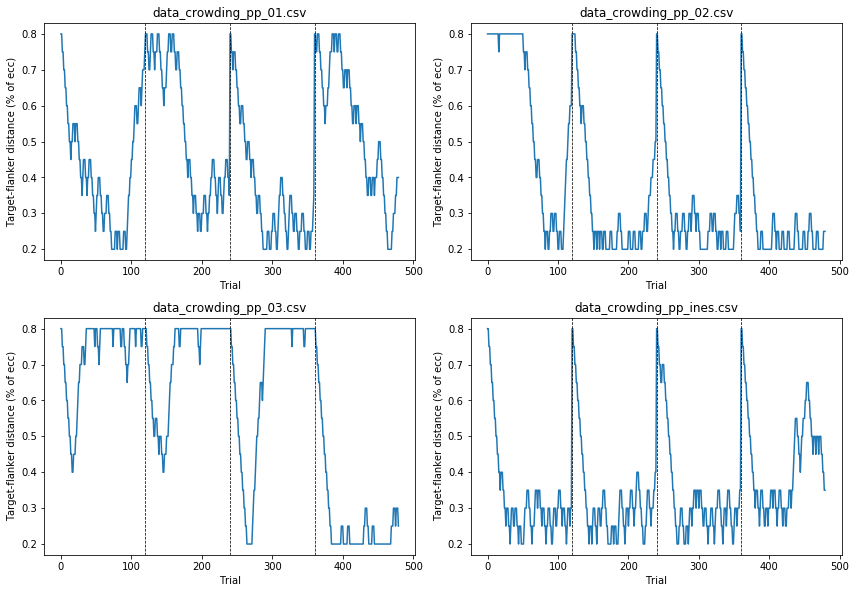

In [67]:
rows = (len(all_files)/2)+1
plt.figure(figsize=(12,rows*4))

for i in range(len(all_files)):
    data_sub = pd.read_csv(all_files[i], sep='\t')
    plt.subplot(rows,2,i+1)
    plt.plot(data_sub["target_flank_ratio"])
    plt.ylabel("Target-flanker distance (% of ecc)")
    plt.xlabel("Trial")
    plt.title(all_files[i])
    xposition = [120, 240, 360]
    for xc in xposition:
        plt.axvline(x=xc, ls='--', c='k', lw=0.75)
plt.tight_layout()